In [88]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import nan
dataset = pd.read_csv("D:/Documents/Desktop/Practikum/realKnownCause/realKnownCause/ambient_temperature_system_failure.csv")

<AxesSubplot:xlabel='timestamp'>

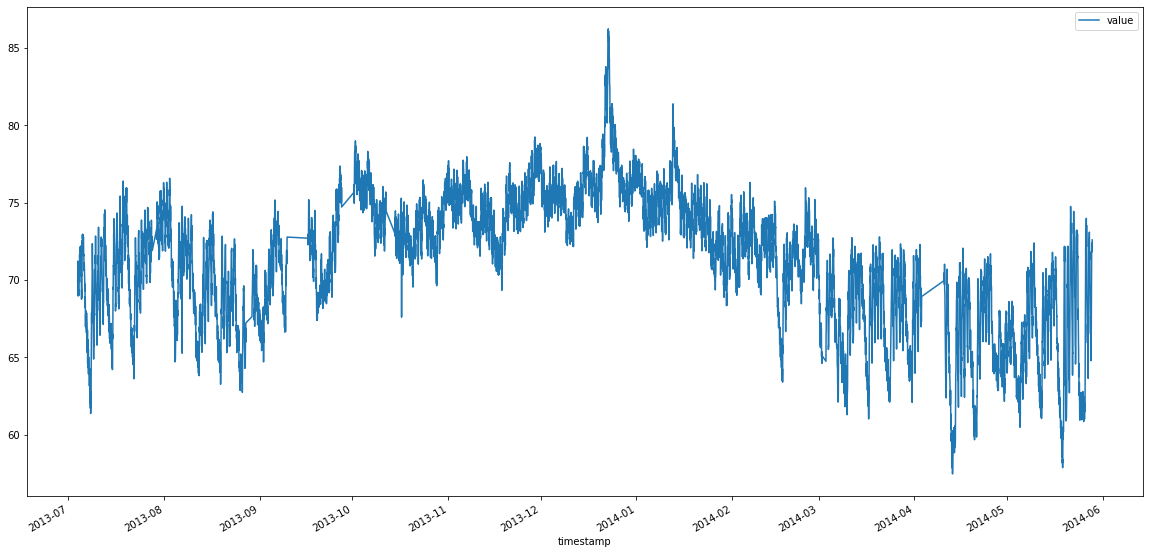

In [76]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'],format='%Y-%m-%d %H:%M:%S')
dp=dataset.copy()
dp.plot(x='timestamp', y='value',figsize=(20, 10))

<AxesSubplot:>

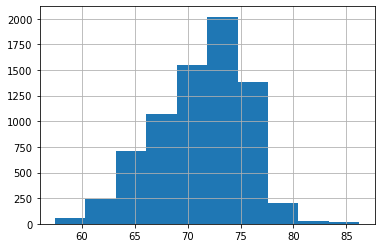

In [81]:
dp['value'].hist()

In [116]:
dl=[]
dataset['Hour'] = dataset['timestamp'].dt.hour 
dataset['day of week'] = dataset['timestamp'].dt.dayofweek 
for i in dataset['Hour']:
    if i>=0 and i<=11:
        dl.append('0')
    else :
        dl.append('1')        
dataset['daylight']=dl
dataset['is weekend']=dataset['day of week']>4
dataset['year'] = dataset['timestamp'].dt.year
dataset['month']=dataset['timestamp'].dt.month
dataset.head(100)
# am-0,pm-1

,timestamp,value,Hour,day of week,daylight,is weekend,year,month
0,2013-07-04 00:00:00,69.880835,0,3,0,False,2013,7
1,2013-07-04 01:00:00,71.220227,1,3,0,False,2013,7
2,2013-07-04 02:00:00,70.877805,2,3,0,False,2013,7
3,2013-07-04 03:00:00,68.959400,3,3,0,False,2013,7
4,2013-07-04 04:00:00,69.283551,4,3,0,False,2013,7
...,...,...,...,...,...,...,...,...
95,2013-07-07 23:00:00,64.246634,23,6,1,True,2013,7
96,2013-07-08 00:00:00,62.480785,0,0,0,False,2013,7
97,2013-07-08 01:00:00,62.030554,1,0,0,False,2013,7
98,2013-07-08 02:00:00,63.411560,2,0,0,False,2013,7


<AxesSubplot:>

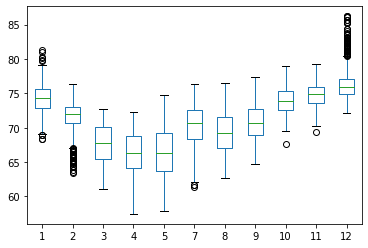

In [80]:
dataset.pivot(columns='month', values='value').plot(kind='box')

In [59]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(dataset)
ds_train
ds_test


,timestamp,value,Hour,day of week,daylight,is weekend,year,date
0,2013-07-04 00:00:00,69.880835,0,3,am,False,2013,2013-07-04
1,2013-07-04 01:00:00,71.220227,1,3,am,False,2013,2013-07-04
2,2013-07-04 02:00:00,70.877805,2,3,am,False,2013,2013-07-04
3,2013-07-04 03:00:00,68.959400,3,3,am,False,2013,2013-07-04
4,2013-07-04 04:00:00,69.283551,4,3,am,False,2013,2013-07-04
...,...,...,...,...,...,...,...,...
7262,2014-05-28 11:00:00,72.370206,11,2,am,False,2014,2014-05-28
7263,2014-05-28 12:00:00,72.172956,12,2,pm,False,2014,2014-05-28
7264,2014-05-28 13:00:00,72.046565,13,2,pm,False,2014,2014-05-28
7265,2014-05-28 14:00:00,71.825226,14,2,pm,False,2014,2014-05-28


In [82]:
dataset.isnull().values.any()

False

In [89]:
#There aren't any missings
n= 0
for val in dataset['value']:
    try:
        float(val)
    except ValueError:
        dataset.loc[cnt, 'value'] = nan
    n += 1
dataset.isnull().values.any()

False

<AxesSubplot:>

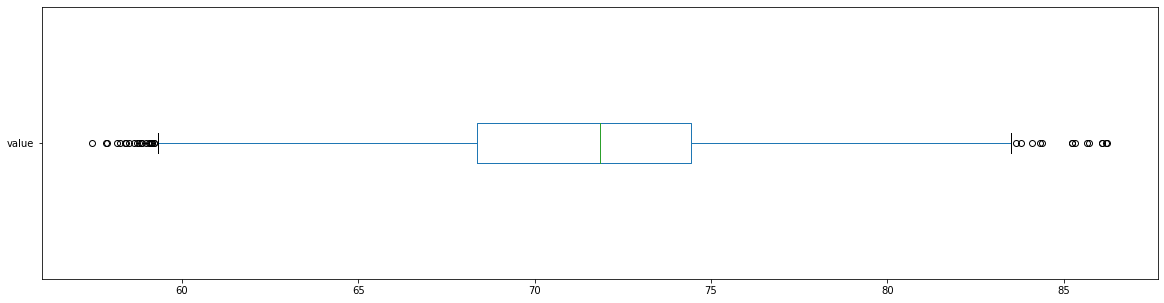

In [93]:
#all values are float
dataset['value'].plot.box(vert=False, figsize=(20, 5))

In [101]:
Q1 = dataset['value'].quantile(0.25)
Q3 = dataset['value'].quantile(0.75)
IQR = Q3 - Q1
out=dataset[(dataset['value'] < (Q1 - 1.5 * IQR)) |(dataset['value'] > (Q3 + 1.5 * IQR))]
out
#outliers

,timestamp,value,Hour,day of week,daylight,is weekend,year,month
3702,2013-12-22 01:00:00,83.780995,1,6,AM,True,2013,12
3718,2013-12-22 17:00:00,84.390932,17,6,PM,True,2013,12
3719,2013-12-22 18:00:00,85.227685,18,6,PM,True,2013,12
3720,2013-12-22 19:00:00,86.094888,19,6,PM,True,2013,12
3721,2013-12-22 20:00:00,86.204189,20,6,PM,True,2013,12
3722,2013-12-22 21:00:00,86.223213,21,6,PM,True,2013,12
3723,2013-12-22 22:00:00,85.649437,22,6,PM,True,2013,12
3724,2013-12-22 23:00:00,86.074710,23,6,PM,True,2013,12
3725,2013-12-23 00:00:00,85.326165,0,0,AM,False,2013,12
3726,2013-12-23 01:00:00,85.705990,1,0,AM,False,2013,12


In [102]:
out.count()

timestamp      35
value          35
Hour           35
day of week    35
daylight       35
is weekend     35
year           35
month          35
dtype: int64

In [106]:
dp.describe()

,value
count,7267.000000
mean,71.242433
std,4.247509
min,57.458406
25%,68.369411
50%,71.858493
75%,74.430958
max,86.223213


In [105]:
dataset.nunique()

timestamp      7267
value          7267
Hour             24
day of week       7
daylight          2
is weekend        2
year              2
month            11
dtype: int64

In [121]:
dp_lst = dataset['timestamp'].to_list()

delta = dp_lst[-1] - dp_lst[0]
periods = delta.components[0]*24+delta.components[1]+1
test_s = pd.date_range(dp_lst[0], periods=periods, freq="H")
test_lst = test_s.to_list()
missing_lst = list(set(test_lst) - set(dp_lst))
missing_lst.sort()
missing_lst
#missing dates

[Timestamp('2013-07-28 02:00:00', freq='H'),
 Timestamp('2013-07-28 05:00:00', freq='H'),
 Timestamp('2013-07-28 06:00:00', freq='H'),
 Timestamp('2013-07-28 07:00:00', freq='H'),
 Timestamp('2013-07-28 08:00:00', freq='H'),
 Timestamp('2013-07-28 09:00:00', freq='H'),
 Timestamp('2013-07-28 10:00:00', freq='H'),
 Timestamp('2013-07-28 11:00:00', freq='H'),
 Timestamp('2013-07-28 12:00:00', freq='H'),
 Timestamp('2013-07-28 13:00:00', freq='H'),
 Timestamp('2013-07-28 14:00:00', freq='H'),
 Timestamp('2013-07-28 15:00:00', freq='H'),
 Timestamp('2013-07-28 16:00:00', freq='H'),
 Timestamp('2013-07-28 17:00:00', freq='H'),
 Timestamp('2013-07-28 18:00:00', freq='H'),
 Timestamp('2013-07-28 19:00:00', freq='H'),
 Timestamp('2013-07-28 20:00:00', freq='H'),
 Timestamp('2013-07-28 21:00:00', freq='H'),
 Timestamp('2013-07-28 22:00:00', freq='H'),
 Timestamp('2013-07-28 23:00:00', freq='H'),
 Timestamp('2013-07-29 00:00:00', freq='H'),
 Timestamp('2013-07-29 01:00:00', freq='H'),
 Timestamp

[Text(0.5, 1.0, 'Frequency Histogram'), Text(0, 0.5, 'Frequency')]

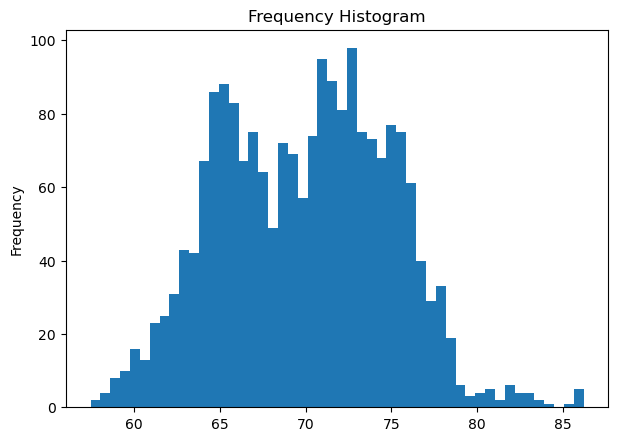

In [119]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5),'figure.dpi':100})
plt.hist(dataset.loc[dataset['is weekend']==True]['value'],bins=50)
plt.gca().set(title='Frequency Histogram',ylabel='Frequency')